In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy import optimize
import matplotlib.ticker as ticker

In [2]:
data = pd.read_excel('data.xlsx')
data

,№,"I, A","N, 1/c","t, c",Unnamed: 4,№.1,"I, A.1","Nф, 1/c",dN,"t,c",Unnamed: 10,№.2,"I, A.2","N-Nф, 1/c",Nф(I)
0,1,0.10,1.410,100.0,NaN,1,0.0,1.36,0.067,300.0,NaN,1,0.10,0.065610,1.344390
1,2,0.20,1.230,NaN,NaN,2,4.1,0.72,0.049,NaN,NaN,2,0.20,-0.098780,1.328780
2,3,0.30,1.540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0.30,0.226829,1.313171
3,4,0.40,1.510,NaN,NaN,k,NaN,NaN,NaN,NaN,NaN,4,0.40,0.212439,1.297561
4,5,0.50,1.560,NaN,NaN,-0.156098,NaN,NaN,NaN,NaN,NaN,5,0.50,0.278049,1.281951
5,6,0.60,1.799,NaN,NaN,1.36,NaN,NaN,NaN,NaN,NaN,6,0.60,0.532659,1.266341
6,7,0.70,2.079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,0.70,0.828268,1.250732
7,8,0.80,2.509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,0.80,1.273878,1.235122
8,9,0.90,2.879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,0.90,1.659488,1.219512
9,10,1.00,3.749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,1.00,2.545098,1.203902


In [3]:
I = data['I, A']
N_Nf = data['N-Nф, 1/c']
pd.DataFrame((I,N_Nf))

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
"I, A",0.10000,0.20000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000,...,3.150000,3.200000,3.250000,3.300000,3.350000,3.400000,3.450000,3.500000,3.600000,3.700000
"N-Nф, 1/c",0.06561,-0.09878,0.226829,0.212439,0.278049,0.532659,0.828268,1.273878,1.659488,2.545098,...,11.807707,13.825512,13.593317,12.141122,9.779927,8.137732,6.126537,3.975341,1.430951,0.727561


In [4]:
err = np.sqrt(N_Nf*100)/100

C:\Python\Python37\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


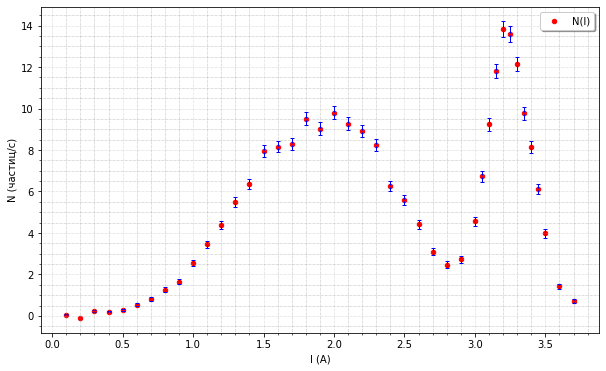

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))

# ax.plot(Tcut, approx(Tcut, *beta_opt1), 'coral', lw = 2)
ax.scatter(I, N_Nf, color = 'red', s = 20)
lgnd = ax.legend([r'N(I)'], loc='upper right', shadow=True)

#ax.set_title(r'Число отсчетов от тока в катушке')
ax.set_ylabel(r'N (частиц/с)')
ax.set_xlabel(r'I (А)')

ax.minorticks_on()

ax.grid(which='minor', color = 'gray', linestyle = ':', linewidth = 0.5)
ax.grid(which='major',linestyle = ':', linewidth = 0.5)

plt.errorbar(I, N_Nf, yerr=err, fmt = 'ro', markersize = '1', capsize = 2, elinewidth = 1, capthick = 1, ecolor = 'blue')

plt.savefig('N(I).png', dpi=400, quality=100)
plt.show()

In [6]:
K = 1013.5 /3.2
K

316.71875

In [7]:
p_e = I * K
p_e

0       31.671875
1       63.343750
2       95.015625
3      126.687500
4      158.359375
5      190.031250
6      221.703125
7      253.375000
8      285.046875
9      316.718750
10     348.390625
11     380.062500
12     411.734375
13     443.406250
14     475.078125
15     506.750000
16     538.421875
17     570.093750
18     601.765625
19     633.437500
20     665.109375
21     696.781250
22     728.453125
23     760.125000
24     791.796875
25     823.468750
26     855.140625
27     886.812500
28     918.484375
29     950.156250
30     965.992188
31     981.828125
32     997.664062
33    1013.500000
34    1029.335938
35    1045.171875
36    1061.007812
37    1076.843750
38    1092.679688
39    1108.515625
40    1140.187500
41    1171.859375
Name: I, A, dtype: float64

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


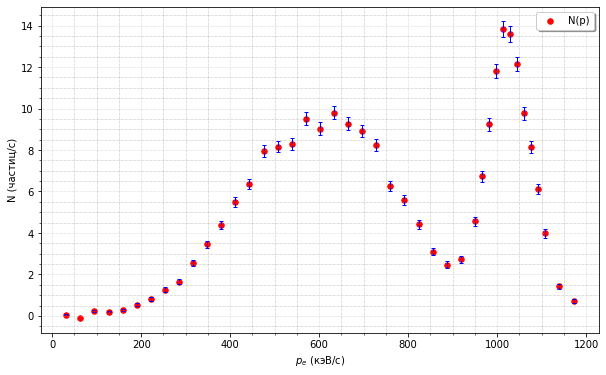

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))

# ax.plot(Tcut, approx(Tcut, *beta_opt1), 'coral', lw = 2)
ax.scatter(p_e, N_Nf, color = 'red', s = 30)
lgnd = ax.legend([r'N(p)'], loc='upper right', shadow=True)

#ax.set_title(r'Число отсчетов от тока в катушке')
ax.set_ylabel(r'N (частиц/с)')
ax.set_xlabel(r'$p_e$ (кэВ/c)')

ax.minorticks_on()

ax.grid(which='minor', color = 'gray', linestyle = ':', linewidth = 0.5)
ax.grid(which='major',linestyle = ':', linewidth = 0.5)

plt.errorbar(p_e, N_Nf, yerr=err, fmt = 'ro', markersize = '1', capsize = 2, elinewidth = 1, capthick = 1, ecolor = 'blue')

plt.savefig('N(p).png', dpi=400, quality=100)
plt.show()

In [9]:
T_e = np.sqrt(p_e**2 + 510**2) - 510

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


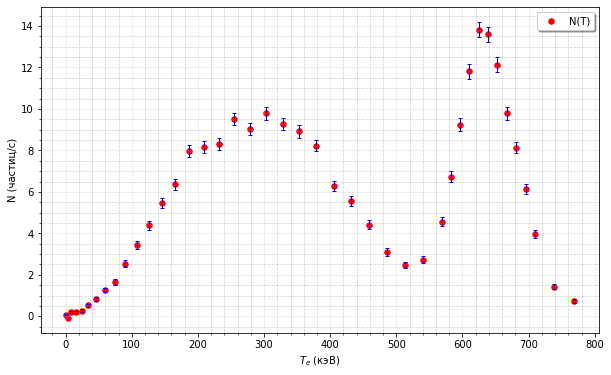

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))

# ax.plot(Tcut, approx(Tcut, *beta_opt1), 'coral', lw = 2)
ax.scatter(T_e, N_Nf, color = 'red', s = 30)
lgnd = ax.legend([r'N(T)'], loc='upper right', shadow=True)

#ax.set_title(r'Число отсчетов от тока в катушке')
ax.set_ylabel(r'N (частиц/с)')
ax.set_xlabel(r'$T_e$ (кэВ)')

ax.minorticks_on()

ax.grid(which='minor', color = 'gray', linestyle = ':', linewidth = 0.5)
ax.grid(which='major',linestyle = ':', linewidth = 0.5)

plt.errorbar(T_e, N_Nf, yerr=err, fmt = 'ro', markersize = '1', capsize = 2, elinewidth = 1, capthick = 1, ecolor = 'blue')

plt.savefig('N(T).png', dpi=400, quality=100)
plt.show()

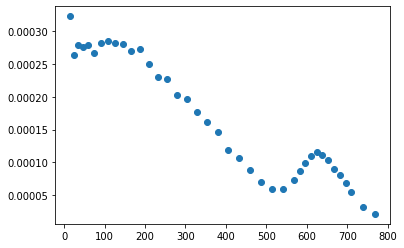

In [11]:
Y = np.sqrt(N_Nf) / (p_e)**(3/2)

plt.scatter(T_e[3:], Y[3:])

a =  -6.307683519862769e-07
b =  0.00038110071163372644
sigma_a =  1.222463010754079e-08
sigma_b =  4.159301669258164e-06
S_e =  5.198623458217959e-06
Relative S_r a = %  1.9380538146921407
Relative S_r b = %  1.091391735121094


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:57: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


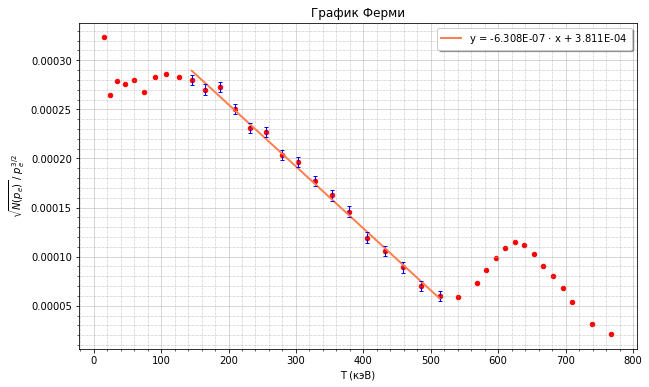

In [12]:
T_e_fit = T_e[12:28]
Y_fit = Y[12:28]

def approx(x, a, b):
    return a * x + b
beta_opt1, beta_cov1 = curve_fit(approx, T_e_fit, Y_fit)
a = beta_opt1[0]
b = beta_opt1[1]


print('a = ', a)
print('b = ', b)



#получим погрешности для коэффициентов
sigma_a = np.sqrt(beta_cov1[0,0])
sigma_b = np.sqrt(beta_cov1[1,1])


print('sigma_a = ', sigma_a)
print('sigma_b = ', sigma_b)


residuals1 = Y_fit - approx(T_e_fit, a, b)
fres1 = sum(residuals1**2)
S_e = np.sqrt(fres1/len(T_e_fit))
print('S_e = ', S_e)


print('Relative S_r a = % ', 100* sigma_a/abs(a))
print('Relative S_r b = % ', 100* sigma_b/abs(b))



# график
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(T_e_fit, approx(T_e_fit, *beta_opt1), 'coral', lw = 2)
ax.scatter(T_e[3:], Y[3:], color = 'red', s = 20)
lgnd = ax.legend([r'y = {:.3E} $\cdot$ x + {:.3E} '.format(a,b)], loc='upper right', shadow=True)

ax.set_title(r'График Ферми')
ax.set_ylabel(r'$\sqrt{N(p_e)}\;/\;p_e^{3/2}$')
ax.set_xlabel(r'T (кэВ)')

ax.minorticks_on()

ax.grid(which='minor',
color = 'gray',
linestyle = ':', linewidth = 0.5)

ax.grid(which='major', linewidth = 0.5)
plt.errorbar(T_e_fit, Y_fit, fmt = 'ro', markersize = '1', yerr = S_e, capsize = 2, elinewidth = 1, capthick = 1, ecolor = 'blue')


plt.savefig('mkFermi.png', dpi=400, quality=100)
plt.show()

In [13]:
E_max = -b/a
E_max

604.1848967749379

In [40]:
E_error = np.sqrt((100* sigma_a/abs(a))**2 + (100* sigma_b/abs(b))**2)
print('%', E_error)
print(E_error/100 * E_max)

% 2.2242276205760483
13.438447353417056


In [39]:
data_1 = data.drop(['Unnamed: 4', '№.1'	,'I, A.1'	,'Nф, 1/c',	'dN'	,'t,c',	'Unnamed: 10',	'№.2',	'I, A.2', 't, c'], axis=1)[['I, A', 'N, 1/c', 'Nф(I)', 'N-Nф, 1/c']]
data_1[r'p_e, кэВ/c'] = p_e
data_1[r'T_e, кэВ'] = T_e
data_1.insert(0, '№', range(1,len(p_e)+1))
with open('table_1.tex', 'w') as f:
    f.write(data_1.to_latex(index=False,position='H', label='t1', caption='Данные', float_format="%.3f"))

data_1

,№,"I, A","N, 1/c",Nф(I),"N-Nф, 1/c","p_e, кэВ/c","T_e, кэВ"
0,1,0.10,1.410,1.344390,0.065610,31.671875,0.982493
1,2,0.20,1.230,1.328780,-0.098780,63.343750,3.918700
2,3,0.30,1.540,1.313171,0.226829,95.015625,8.775451
3,4,0.40,1.510,1.297561,0.212439,126.687500,15.499498
4,5,0.50,1.560,1.281951,0.278049,158.359375,24.020310
5,6,0.60,1.799,1.266341,0.532659,190.031250,34.253503
6,7,0.70,2.079,1.250732,0.828268,221.703125,46.104555
7,8,0.80,2.509,1.235122,1.273878,253.375000,59.472467
8,9,0.90,2.879,1.219512,1.659488,285.046875,74.253131
9,10,1.00,3.749,1.203902,2.545098,316.718750,90.342208
